6021501535 2
4139480200 2
7520000520 2
3969300030 2
2231500030 2
8820903380 2
726049190 2
8682262400 2
9834200885 2
8062900070 2
1231000510 2
6117501820 2
2228900270 2
3630120700 2
7888000390 2
2143700830 2
3395040550 2
4345000510 2
9407110710 2
1000102 2
1781500435 2
1232000810 2
7856400240 2
7983000200 2
9136103130 2
5083000375 2
7409700215 2
1823049202 2
2767602141 2
1254200015 2
723049156 2
4435000705 2
4364700600 2
1825069031 2
3262300940 2
9353300600 2
1524079093 2
9809000020 2
3303000130 2
7524400250 2
4204400098 2
6632900574 2
2726049071 2
3578401060 2
1788800630 2
6381500170 2
1954420170 2
1545800290 2
9828200460 2
9222400605 2
8832900780 2
8645530010 2
3323059027 2
5417600130 2
8651510380 2
5249801440 2
526059224 2
1446403850 2
251300110 2
4139420590 2
2621600015 2
2206700215 2
2787460720 2
3883800011 2
4154300296 2
1721801010 2
1237500540 2
5101405604 2
5127001320 2
5282200015 2
7977201065 2
3739500096 2
1568100300 2
1922059278 2
302000375 2
722039087 2
8129700644 2
44438003

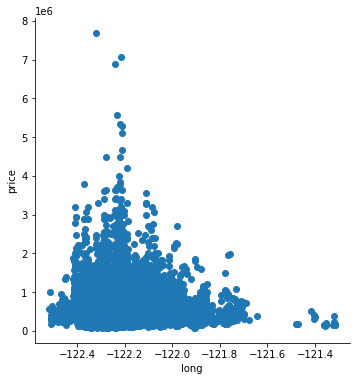

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
df=pd.read_csv('kc_house_data.csv')
#df.drop(['id'],axis=1, inplace=True)
#print(df.at[0, 'bedrooms'])
x = {}
for i in range(len(df['id'])):
    if df.at[i, 'id'] not in x: 
        x[df.at[i, 'id']] = 1
    else:
        x[df.at[i, 'id']] += 1

for i in x.keys():
    if x[i] > 1:
        print(i, x[i])

new=sns.PairGrid(df,x_vars=['long'], y_vars=['price'],height=5,aspect=1)

new.map(plt.scatter)
plt.show()
        